<a href="https://colab.research.google.com/github/pbeens/OTF-Data-Analysis-2021-05/blob/main/Demo_Input_Data_from_Table_on_Website_(CAFE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is CAFE (Corporate Average Fuel Economy) data that needs some fixing before it can be graphed. The initial complications are the multi-line header and the last row of the table.

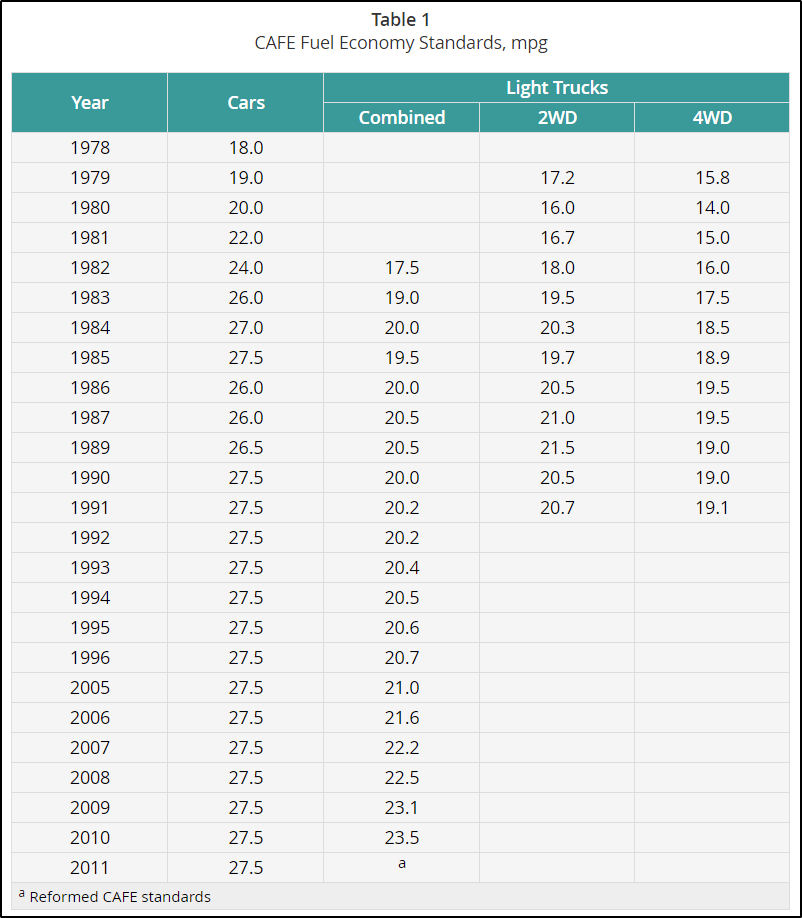

In [1]:
# Read in pandas library

import pandas as pd

In [2]:
# Enter the URL here

url = 'https://dieselnet.com/standards/us/fe.php'

In [3]:
# Read in the data from the website and put it in a dataframe
# Observation: We need to delete the last row.

df_list = pd.read_html(url)
df = df_list[0] # first table = index 0
df

Year  ...               Light Trucks
                         Year  ...                        4WD
0                        1978  ...                        NaN
1                        1979  ...                       15.8
2                        1980  ...                       14.0
3                        1981  ...                       15.0
4                        1982  ...                       16.0
5                        1983  ...                       17.5
6                        1984  ...                       18.5
7                        1985  ...                       18.9
8                        1986  ...                       19.5
9                        1987  ...                       19.5
10                       1989  ...                       19.0
11                       1990  ...                       19.0
12                       1991  ...                       19.1
13                       1992  ...                        NaN
14                       1993  ...                        NaN
15                       1994  ...                        NaN
16                       1995  ...                        NaN
17                       1996  ...                        NaN
18                       2005  ...                        NaN
19                       2006  ...                        NaN
20                       2007  ...                        NaN
21                       2008  ...                        NaN
22                       2009  ...                        NaN
23                       2010  ...                        NaN
24                       2011  ...                        NaN
25  a Reformed CAFE standards  ...  a Reformed CAFE standards

[26 rows x 5 columns]

In [4]:
# Let's get rid of the last row

df = df[:-1] # this is called slicing
df

Year  Cars Light Trucks            
    Year  Cars     Combined   2WD   4WD
0   1978  18.0          NaN   NaN   NaN
1   1979  19.0          NaN  17.2  15.8
2   1980  20.0          NaN  16.0  14.0
3   1981  22.0          NaN  16.7  15.0
4   1982  24.0         17.5  18.0  16.0
5   1983  26.0         19.0  19.5  17.5
6   1984  27.0         20.0  20.3  18.5
7   1985  27.5         19.5  19.7  18.9
8   1986  26.0         20.0  20.5  19.5
9   1987  26.0         20.5  21.0  19.5
10  1989  26.5         20.5  21.5  19.0
11  1990  27.5         20.0  20.5  19.0
12  1991  27.5         20.2  20.7  19.1
13  1992  27.5         20.2   NaN   NaN
14  1993  27.5         20.4   NaN   NaN
15  1994  27.5         20.5   NaN   NaN
16  1995  27.5         20.6   NaN   NaN
17  1996  27.5         20.7   NaN   NaN
18  2005  27.5         21.0   NaN   NaN
19  2006  27.5         21.6   NaN   NaN
20  2007  27.5         22.2   NaN   NaN
21  2008  27.5         22.5   NaN   NaN
22  2009  27.5         23.1   NaN   NaN
23  2010  27.5         23.5   NaN   NaN
24  2011  27.5            a   NaN   NaN

In [5]:
# Let's look at the datatypes
# Note that the Year and Cars columns aren't numeric so we'll have
# to fix that before we can graph it.

df.dtypes

Year          Year        object
Cars          Cars        object
Light Trucks  Combined    object
              2WD         object
              4WD         object
dtype: object

In [6]:
# Let's look at the columns
# Observation: it's a MultiIndex

df.columns

MultiIndex([(        'Year',     'Year'),
            (        'Cars',     'Cars'),
            ('Light Trucks', 'Combined'),
            ('Light Trucks',      '2WD'),
            ('Light Trucks',      '4WD')],
           )

In [7]:
# Let's get rid of the MultiIndex
# Observation: Horrible names so let's rename them in the next cell

df.columns = df.columns.map(''.join)
df.columns

Index(['YearYear', 'CarsCars', 'Light TrucksCombined', 'Light Trucks2WD',
       'Light Trucks4WD'],
      dtype='object')

In [8]:
# Let's rename the columns to something nicer

df = df.rename(columns={'YearYear': 'Year',
                        'CarsCars': 'CAFE MPG',
                        'Light TrucksCombined': 'All Light Trucks CAFE MPG',
                        'Light Trucks2WD': '2WD Light Trucks CAFE MPG',
                        'Light Trucks4WD': '4WD Light Trucks CAFE MPG'})
df.columns


Index(['Year', 'CAFE MPG', 'All Light Trucks CAFE MPG',
       '2WD Light Trucks CAFE MPG', '4WD Light Trucks CAFE MPG'],
      dtype='object')

In [9]:
# Now we have to convert the columns we want to graph to numeric

df['Year'] = pd.to_numeric(df['Year'])
df['CAFE MPG'] = pd.to_numeric(df['CAFE MPG'])
df.dtypes

Year                           int64
CAFE MPG                     float64
All Light Trucks CAFE MPG     object
2WD Light Trucks CAFE MPG     object
4WD Light Trucks CAFE MPG     object
dtype: object

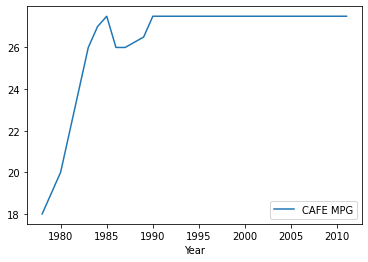

In [10]:
# Let's plot!
# Some options to play with here: legend, ylabel, grid, title

df.plot(kind='line',
        x='Year',
        y='CAFE MPG')